In [1]:
import os,sys
#Change and check directory
os.chdir('C:\WGU\D208\PA')
os.getcwd()

'C:\\WGU\\D208\\PA'

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
#Regression Modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#Accuracy Score
from sklearn.metrics import accuracy_score

#load the data frame
df = pd.read_csv('churn_clean.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
#Data Cleaning
#Detect and treat NULLS - we can see from the describe call that there is only one column with missing values
#InternetService: This column actually doesn't have any null values it just got read in as NULL rather than None indicating the customer doesn't have this service
df['InternetService'].fillna('None',inplace=True)

In [4]:
#Drop columns we won't be using
df = df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Area', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Techie', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [5]:
#Summary Statistics and Reviewing for Outliers
df.describe()

,Population,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [6]:
categorical_columns = ['Churn','Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'InternetService', 'PaymentMethod']
for x in categorical_columns:
    print(df[x].describe())

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object
count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object
count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object
count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object
count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object
count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object
count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object
count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object
count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object
count     10000
unique        2
top       

In [7]:
#One hot encoding 
continuous_columns = ['Population', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype = int)
#Rename the columns for clarity and to remove spaces
df = df.rename(columns = {'Contract_One year':'Contract_One_Year', 'Contract_Two Year':'Contract_Two_Year','InternetService_Fiber Optic':'InternetService_Fiber_Optic', 'InternetService_Fiber Optic':'InternetService_Fiber_Optic', 'PaymentMethod_Credit Card (automatic)':'PaymentMethod_CC', 'PaymentMethod_Electronic Check':'PaymentMethod_ECheck', 'PaymentMethod_Mailed Check':'PaymentMethod_MCheck'})
categorical_columns = ['Churn_Yes','Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'InternetService_Fiber_Optic','InternetService_None', 'PaymentMethod_CC', 'PaymentMethod_ECheck', 'PaymentMethod_MCheck']
#Store all the columns for easy access later
columns = categorical_columns + continuous_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Population                   10000 non-null  int64  
 1   Outage_sec_perweek           10000 non-null  float64
 2   Email                        10000 non-null  int64  
 3   Contacts                     10000 non-null  int64  
 4   Yearly_equip_failure         10000 non-null  int64  
 5   Tenure                       10000 non-null  float64
 6   MonthlyCharge                10000 non-null  float64
 7   Bandwidth_GB_Year            10000 non-null  float64
 8   Churn_Yes                    10000 non-null  int32  
 9   Port_modem_Yes               10000 non-null  int32  
 10  Tablet_Yes                   10000 non-null  int32  
 11  Phone_Yes                    10000 non-null  int32  
 12  Multiple_Yes                 10000 non-null  int32  
 13  OnlineSecurity_Yes   

In [8]:
df.head()

,Population,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn_Yes,Port_modem_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Contract_One_Year,Contract_Two_Year,InternetService_Fiber_Optic,InternetService_None,PaymentMethod_CC,PaymentMethod_ECheck,PaymentMethod_MCheck
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,7.978323,10,0,1,6.795513,172.455519,904.536110,0,1,...,0,1,1,1,0,1,0,1,0,0
2,10446,11.699080,12,0,1,1.156681,242.632554,800.982766,1,0,...,1,1,1,0,0,1,0,0,0,0
3,3735,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,...,0,1,1,0,1,0,0,1,0,0
4,13863,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,0,...,1,0,1,0,1,0,0,0,0,1
5,11352,8.147417,16,2,1,1.670972,149.948316,271.493436,1,1,...,1,0,0,0,0,1,0,0,0,1


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>,
        <Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>,
        <Axes: title={'center': 'Churn_Yes'}>,
        <Axes: title={'center': 'Port_modem_Yes'}>],
       [<Axes: title={'center': 'Tablet_Yes'}>,
        <Axes: title={'center': 'Phone_Yes'}>,
        <Axes: title={'center': 'Multiple_Yes'}>,
        <Axes: title={'center': 'OnlineSecurity_Yes'}>,
        <Axes: title={'center': 'OnlineBackup_Yes'}>],
       [<Axes: title={'center': 'DeviceProtection_Yes'}>,
        <Axes: title={'center': 'TechSupport_Yes'}>,
        <Axes: title={'center': 'StreamingTV_Yes'}>,
        <Axes: title={'center': 'StreamingMovies_Yes'}>,
        <Axes: title=

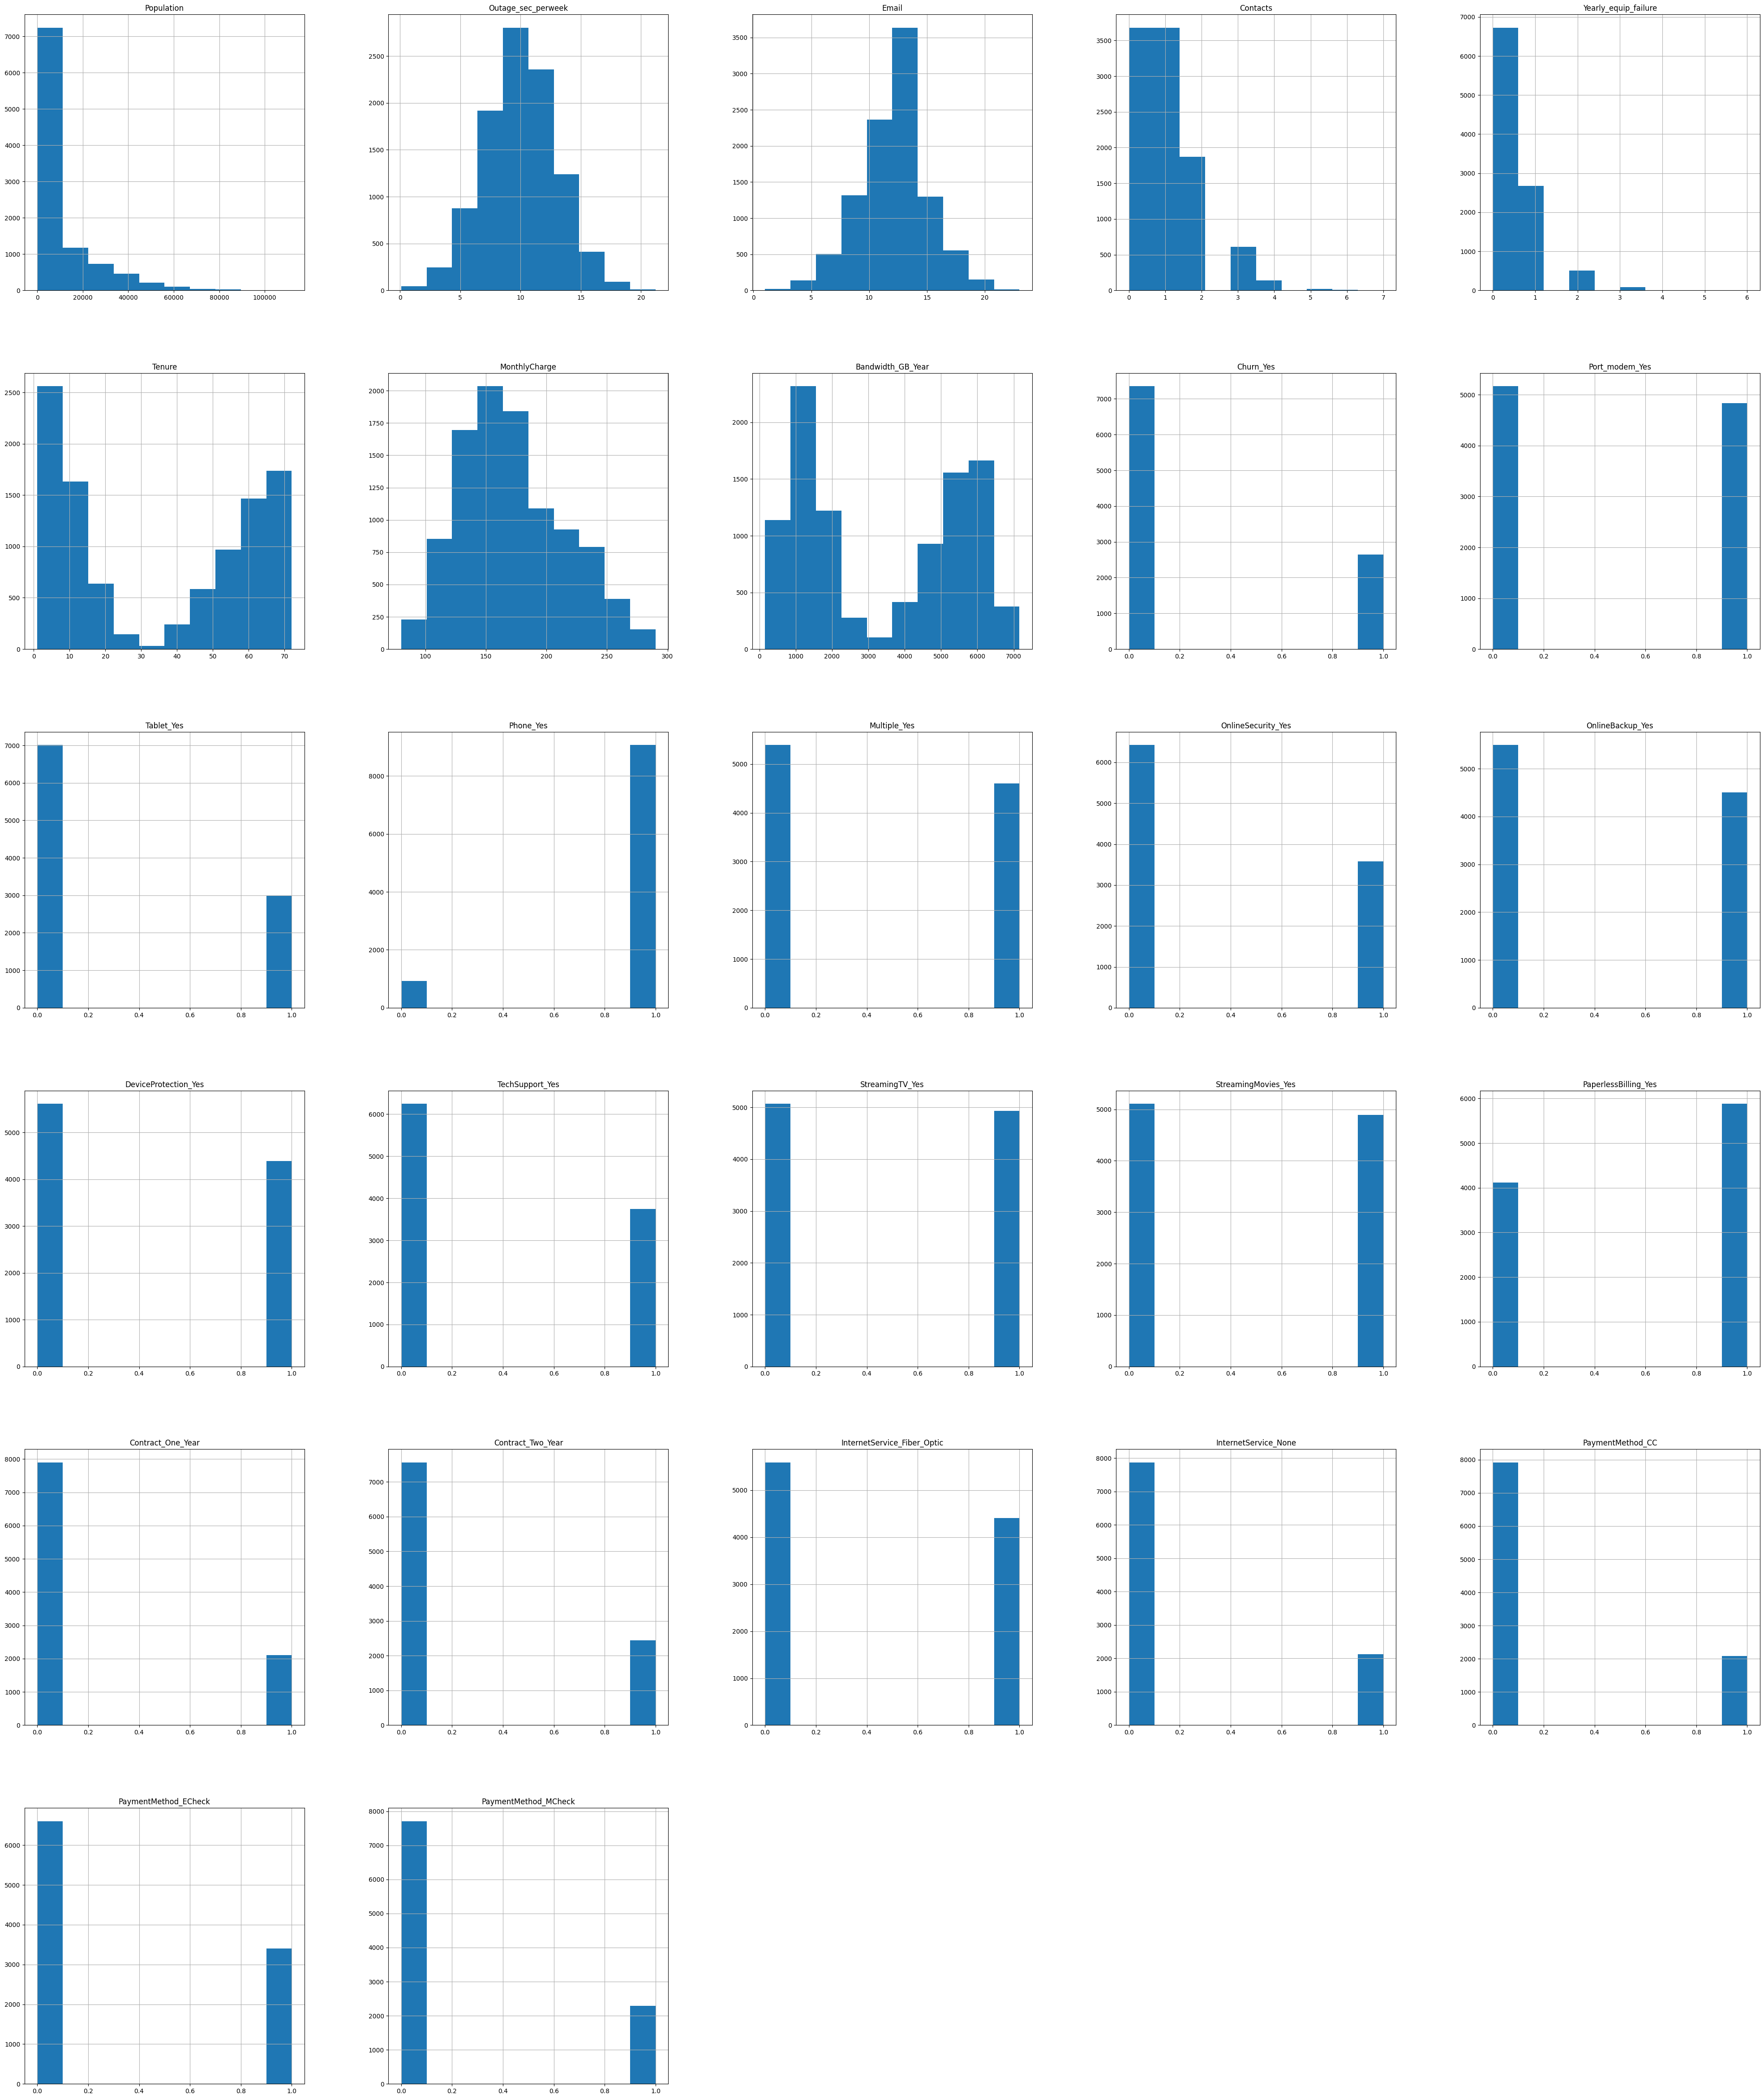

In [9]:
#Visualizations
#Univariate
df.hist(figsize =(50,60))

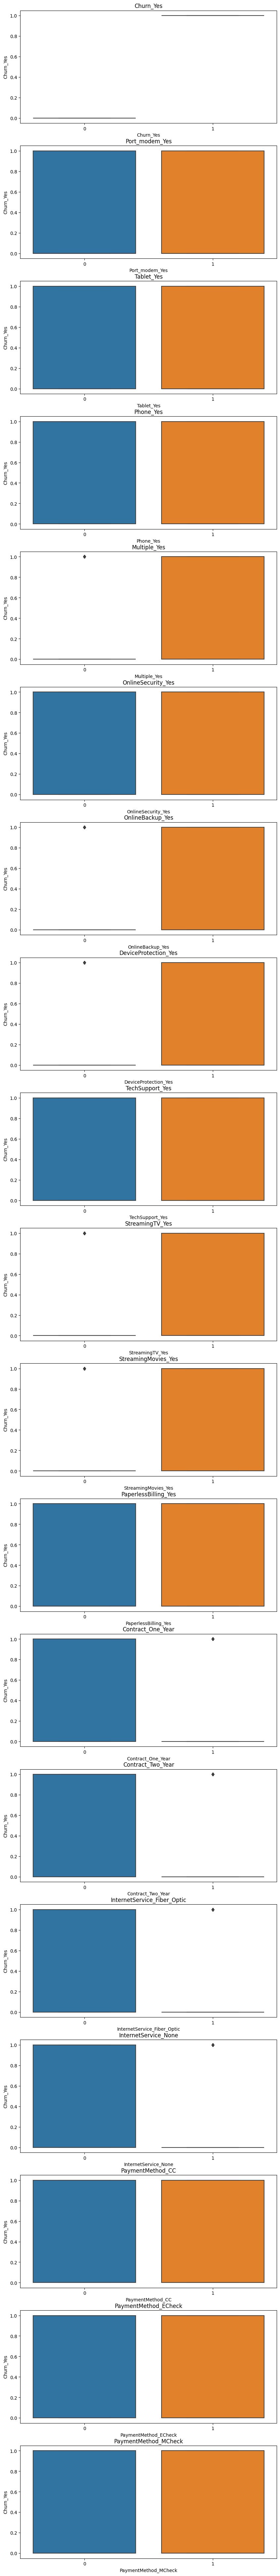

In [10]:
#Boxplots
fig, axis = plt.subplots(19, 1, figsize=(10, 100))
i = 0
len_axis = len(axis)
for plot in axis:
    sns.boxplot(data = df, ax=plot, x=categorical_columns[i], y=df["Churn_Yes"]).set(title=categorical_columns[i])
    i = i+1
plt.show()

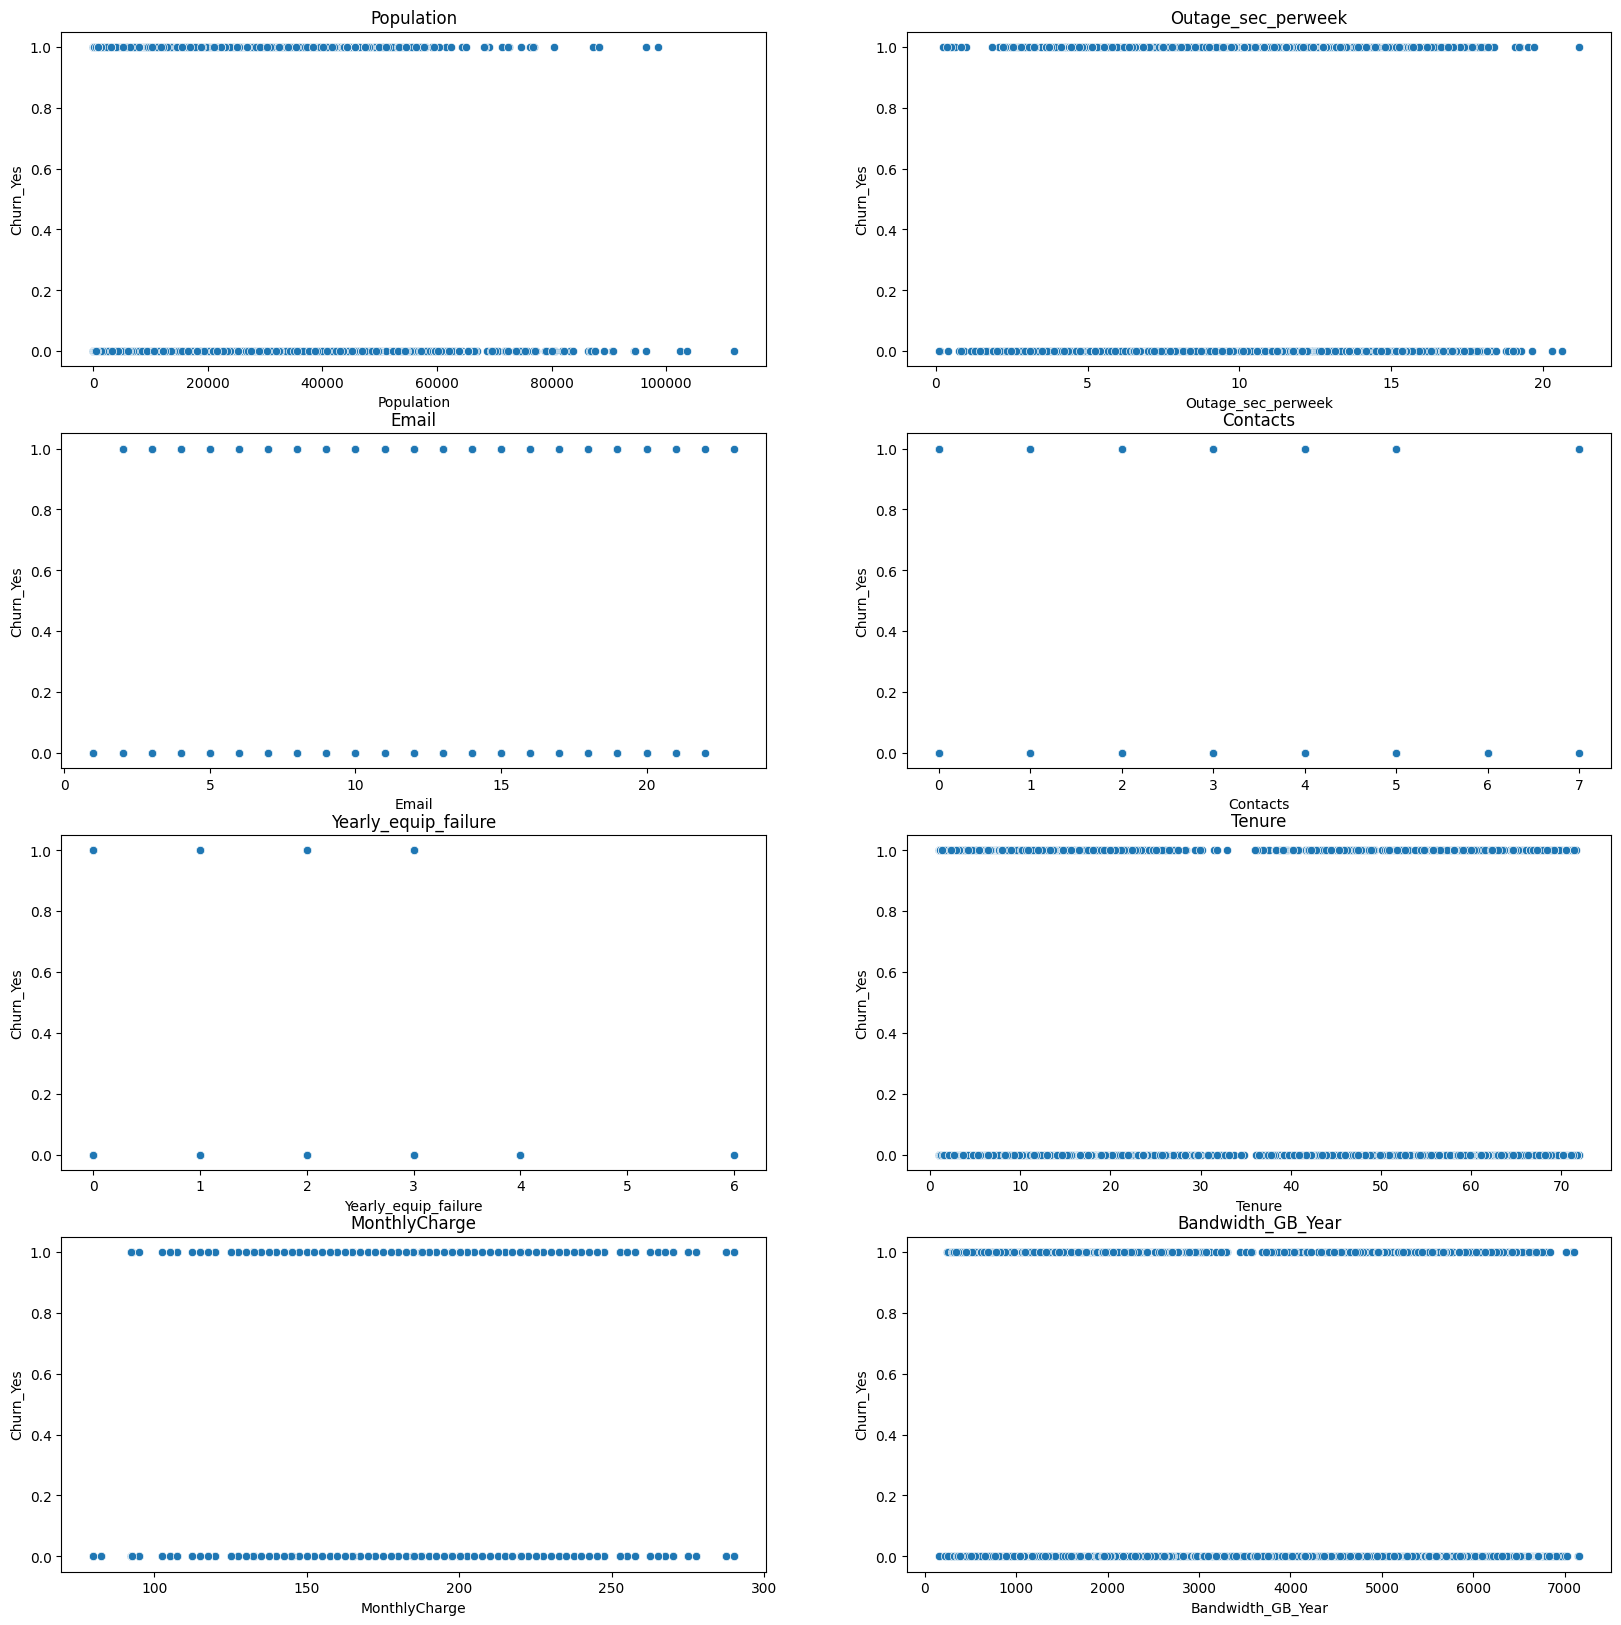

In [11]:
#Bivariate
#Scatterplots 
fig, axis = plt.subplots(4, 2, figsize=(20, 20))
i = 0
len_axis = len(axis)
for row in axis:
    for plot in row:
        sns.scatterplot(data=df, x=continuous_columns[i], y=df["Churn_Yes"], ax=plot).set(title=continuous_columns[i])
        i = i+1
plt.show()

In [12]:
#Export the prepared data set
df.to_csv('PREPARED_Task2_churn_clean_data.csv')

In [13]:
#Initial Model
columns.remove("Churn_Yes")
X = df[columns]
y = df['Churn_Yes']
X = sm.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.224192
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7973
Method:                           MLE   Df Model:                           26
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.6111
Time:                        16:37:58   Log-Likelihood:                -1793.5
converged:                       True   LL-Null:                       -4611.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.7344      0.538     -8.795      0.000   

In [14]:
#Reduced Model
#Create a new column to keep the reduced columns
reduced_columns = columns
#Keep reducing until all the p-values are below .05
while model.pvalues.max() > .05:
    max_P = model.pvalues.max()
    for column in X:
        if(model.pvalues.loc[column] == max_P):
            reduced_columns.remove(column)
            print("Column removed: " + column)
            break
    X = df[reduced_columns]
    X = sm.add_constant(X)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    model = sm.Logit(y_train,x_train).fit()

Column removed: Email
Optimization terminated successfully.
         Current function value: 0.224192
         Iterations 9
Column removed: Bandwidth_GB_Year
Optimization terminated successfully.
         Current function value: 0.224200
         Iterations 9
Column removed: Yearly_equip_failure
Optimization terminated successfully.
         Current function value: 0.224209
         Iterations 9
Column removed: Outage_sec_perweek
Optimization terminated successfully.
         Current function value: 0.224223
         Iterations 9
Column removed: DeviceProtection_Yes
Optimization terminated successfully.
         Current function value: 0.224255
         Iterations 9
Column removed: OnlineBackup_Yes
Optimization terminated successfully.
         Current function value: 0.224280
         Iterations 9
Column removed: Population
Optimization terminated successfully.
         Current function value: 0.224312
         Iterations 9
Column removed: Contacts
Optimization terminated successfully

In [15]:
#Final Reduced Model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.6094
Time:                        16:37:58   Log-Likelihood:                -1801.4
converged:                       True   LL-Null:                       -4611.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.1038      0.333    -12.329      0.000      -4.756      -3.451
Phone_Yes                      -0.3305      0.144     -2.300      0.021      -0.

In [16]:
#Confusion Matrix
y_pred = model.predict(x_test)
y_pred = (y_pred >= .5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)
print("Accuracy Score")
print(accuracy_score(y_test,y_pred,normalize=True))

Confusion Matrix
[[1368   88]
 [ 105  439]]
Accuracy Score
0.9035
